# [데이콘]
# 영화 관객수 예측 모델


## 데이터 불러오기
- movies_train.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('movies_train.csv')
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 데이터 전처리

### 불필요한열 제거

In [ ]:
df.drop(columns=["title","time", "release_time", "director"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


### 결측치 처리

In [ ]:
df.fillna(0, inplace =True)

### 카테고리 컬럼 인코딩

In [ ]:
# distributor
df.distributor = df.distributor.astype('category')
df["dist_code"] = df.distributor.cat.codes

# genre
df.genre = df.genre.astype('category')
df["genre_code"] = df.genre.cat.codes

# screening_rat
df.screening_rat = df.screening_rat.astype('category')
df["sc_code"] = df.screening_rat.cat.codes

### shuffle

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dist_code,genre_code,sc_code
0,(주)쇼박스,드라마,15세 관람가,1242778.00,2,298,6,9135806,21,4,1
1,마노엔터테인먼트,드라마,12세 관람가,0.00,0,2,4,4550,83,4,0
2,고구마공작소,멜로/로맨스,청소년 관람불가,17615314.00,1,27,3,8,65,5,3
3,CJ 엔터테인먼트,드라마,12세 관람가,3549473.00,4,520,2,7759711,51,4,0
4,시네마달,다큐멘터리,15세 관람가,0.00,0,35,1,50308,106,3,1
...,...,...,...,...,...,...,...,...,...,...,...
595,KT&G 상상마당,드라마,15세 관람가,0.00,0,91,3,4486,54,4,1
596,CJ 엔터테인먼트,멜로/로맨스,청소년 관람불가,14188.00,1,450,3,471248,51,5,3
597,롯데엔터테인먼트,드라마,12세 관람가,1347413.75,4,574,2,627586,80,4,0
598,조이앤시네마,멜로/로맨스,청소년 관람불가,0.00,0,100,2,17444,146,5,3


### log 스케일 변환

In [ ]:
# dir_prev_bfnum, num_staff, box_off_num
# 값이 0일경우 log취하면 무한대이므로 자동으로 값에 +1처리를 해주는 log1p함수를 사용
# 수동으로 할 경우(np.log) 0인값을 1로 바꿔주고 진행해야함
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   dist_code           600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  sc_code             600 non-null    int8    
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 49.2 KB


### 표준화

In [ ]:
# # int를 float으로 변환
# df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
# df['num_actor'] = df.num_actor.astype(np.float)

# # 표준화
# df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean()) / df.dir_prev_num.std()
# df['num_actor'] = (df.num_actor - df.num_actor.mean()) / df.num_actor.std()
# df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean()) / df.dir_prev_bfnum_log.std()
# df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean()) / df.num_staff_log.std()
# df['box_off_num_log'] = (df.box_off_num_log - df.box_off_num_log.mean()) / df.box_off_num_log.std()

### one-hot encoding
더미변수로 변환
(종속변수 속성의 종류별로 펼쳐줌. 맞으면 1, 아니면 0)

In [ ]:
df = pd.get_dummies(df, columns =['dist_code'])
df = pd.get_dummies(df, columns =['genre_code'])
df = pd.get_dummies(df, columns =['sc_code'])

In [ ]:
df.info()
# 컬럼 196개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 196 entries, distributor to sc_code_3
dtypes: category(3), float64(4), int64(4), uint8(185)
memory usage: 155.3 KB


In [ ]:
# 불필요한 열 제거
# distributor, genre, screening_rat, box_off_num, dir_prev_bfnum, num_staff
# box_off_num는 예측변수
df.drop(columns=['distributor', 'genre', 'screening_rat', 'dir_prev_bfnum', 'num_staff','box_off_num'], inplace=True)
df

,dir_prev_num,num_actor,dir_prev_bfnum_log,num_staff_log,box_off_num_log,dist_code_0,dist_code_1,dist_code_2,dist_code_3,dist_code_4,dist_code_5,dist_code_6,dist_code_7,dist_code_8,dist_code_9,dist_code_10,dist_code_11,dist_code_12,dist_code_13,dist_code_14,dist_code_15,dist_code_16,dist_code_17,dist_code_18,dist_code_19,dist_code_20,dist_code_21,dist_code_22,dist_code_23,dist_code_24,dist_code_25,dist_code_26,dist_code_27,dist_code_28,dist_code_29,dist_code_30,dist_code_31,dist_code_32,dist_code_33,dist_code_34,...,dist_code_145,dist_code_146,dist_code_147,dist_code_148,dist_code_149,dist_code_150,dist_code_151,dist_code_152,dist_code_153,dist_code_154,dist_code_155,dist_code_156,dist_code_157,dist_code_158,dist_code_159,dist_code_160,dist_code_161,dist_code_162,dist_code_163,dist_code_164,dist_code_165,dist_code_166,dist_code_167,dist_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,sc_code_0,sc_code_1,sc_code_2,sc_code_3
0,2,6,14.032861,5.700444,16.027712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,4,0.000000,1.098612,8.423102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,3,16.684279,3.332205,2.197225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,2,15.082310,6.255750,15.864456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0.000000,3.583519,10.825939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,3,0.000000,4.521789,8.408940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
596,1,3,9.560222,6.111467,13.063142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
597,4,2,14.113698,6.354370,13.349638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
598,0,2,0.000000,4.615121,9.766808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### x, y 데이터 numpy배열로 변경

In [ ]:
y = df.box_off_num_log.to_numpy()

df.drop(columns=['box_off_num_log'], inplace=True)
x = df.to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


### train, test 데이터 나누기

In [ ]:
i = int(len(x)*0.8)
trainx, testx = x[:i], x[i:]
trainy, testy = y[:i], y[i:]

## 딥러닝 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1900      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


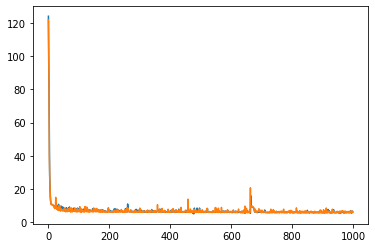

4/4 [==============================] - 0s 4ms/step - loss: 7.1300 - mape: 26.0503 - root_mean_squared_error: 2.6702
loss= 7.130028247833252
mape= 26.050296783447266
rmse= 2.6702113151550293


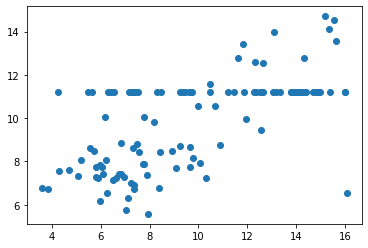

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
# input_shape=(189,)  ==  model.add(Input(189))
# input_shape로 인풋을 넣으면 데이터 프레임으로도 넣을수있음
model.add(Dense(10, activation='relu', input_shape=(189,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(trainx, trainy, epochs=1000, verbose=0,
                    batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape, rmse = model.evaluate(testx, testy)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(testx)

plt.scatter(testy, y_) # 정답은 x축, 예측값은 y로 (따라서 기울기가 1일때 가장 예측이 잘됨)
plt.show()

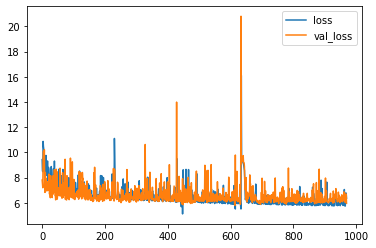

In [ ]:
# loss의 추세를 보기위해 앞부분을 날린다
plt.plot(history.history['loss'][30:], label='loss')
plt.plot(history.history['val_loss'][30:], label='val_loss')
plt.legend()
plt.show()
# loss값이 줄어드는 추세라면 잘된 예측으로보고 학습을 멈춘다
# 표준화 해주니 오버피팅 추세가 나타남

### RMSE 구하기

In [ ]:
pre = np.exp(y_)
org_testy = np.exp(testy)

rmse =RootMeanSquaredError()
r = rmse(pre, org_testy)
print(r)

tf.Tensor(1742640.2, shape=(), dtype=float32)


학습시킨 후 RMSE로 평가도 해보았다.